## Exploring measures extracted from Surface Parcellations and sub-cortical ROIs

#### We will start with loading thickness measures and identify which of the ROIs are comparitively different across Cognitively Normal and Alzheimer's Disease

In [93]:
import pandas as pd

In [94]:
rh_thickness = pd.read_csv('rh_thickness.csv')

In [95]:
roi_cols = ['rh_bankssts_thickness',
            'rh_caudalanteriorcingulate_thickness',
            'rh_caudalmiddlefrontal_thickness',
            'rh_cuneus_thickness',
            'rh_entorhinal_thickness',
            'rh_fusiform_thickness',
            'rh_inferiorparietal_thickness',
            'rh_inferiortemporal_thickness',
            'rh_isthmuscingulate_thickness',
            'rh_lateraloccipital_thickness',
            'rh_lateralorbitofrontal_thickness',
            'rh_lingual_thickness',
            'rh_medialorbitofrontal_thickness',
            'rh_middletemporal_thickness',
            'rh_parahippocampal_thickness',
            'rh_paracentral_thickness',
            'rh_parsopercularis_thickness',
            'rh_parsorbitalis_thickness',
            'rh_parstriangularis_thickness',
            'rh_pericalcarine_thickness',
            'rh_postcentral_thickness',
            'rh_posteriorcingulate_thickness',
            'rh_precentral_thickness',
            'rh_precuneus_thickness',
            'rh_rostralanteriorcingulate_thickness',
            'rh_rostralmiddlefrontal_thickness',
            'rh_superiorfrontal_thickness',
            'rh_superiorparietal_thickness',
            'rh_superiortemporal_thickness',
            'rh_supramarginal_thickness',
            'rh_frontalpole_thickness',
            'rh_temporalpole_thickness',
            'rh_transversetemporal_thickness',
            'rh_insula_thickness',]

### Selecting only ROIs and Group

In [96]:
df_rh_thickness = rh_thickness[['Group'] + roi_cols]

### Make new dataframe for plotting

In [97]:
df_rh_thickness_new = pd.melt(df_rh_thickness,
                              id_vars=['Group'],
                              value_vars=roi_cols,
                              var_name='ROI',
                              value_name='cortical thickness rh')

### Visualization

In [98]:
!pip install seaborn

In [99]:
from matplotlib import pyplot as plt
import seaborn as sns

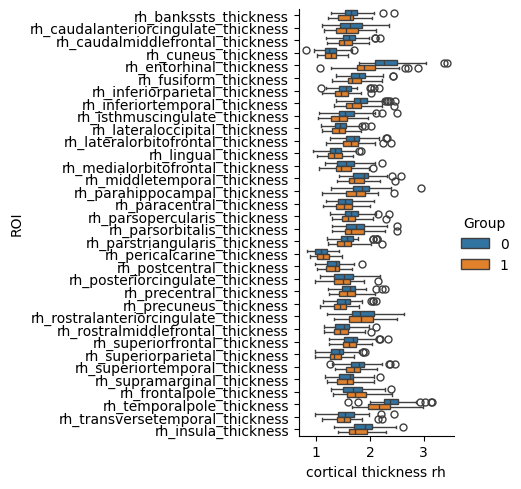

In [100]:
sns.catplot(data=df_rh_thickness_new, x='cortical thickness rh',
            y='ROI', hue='Group', kind='box')

### ROIs selected for statistical comparisons

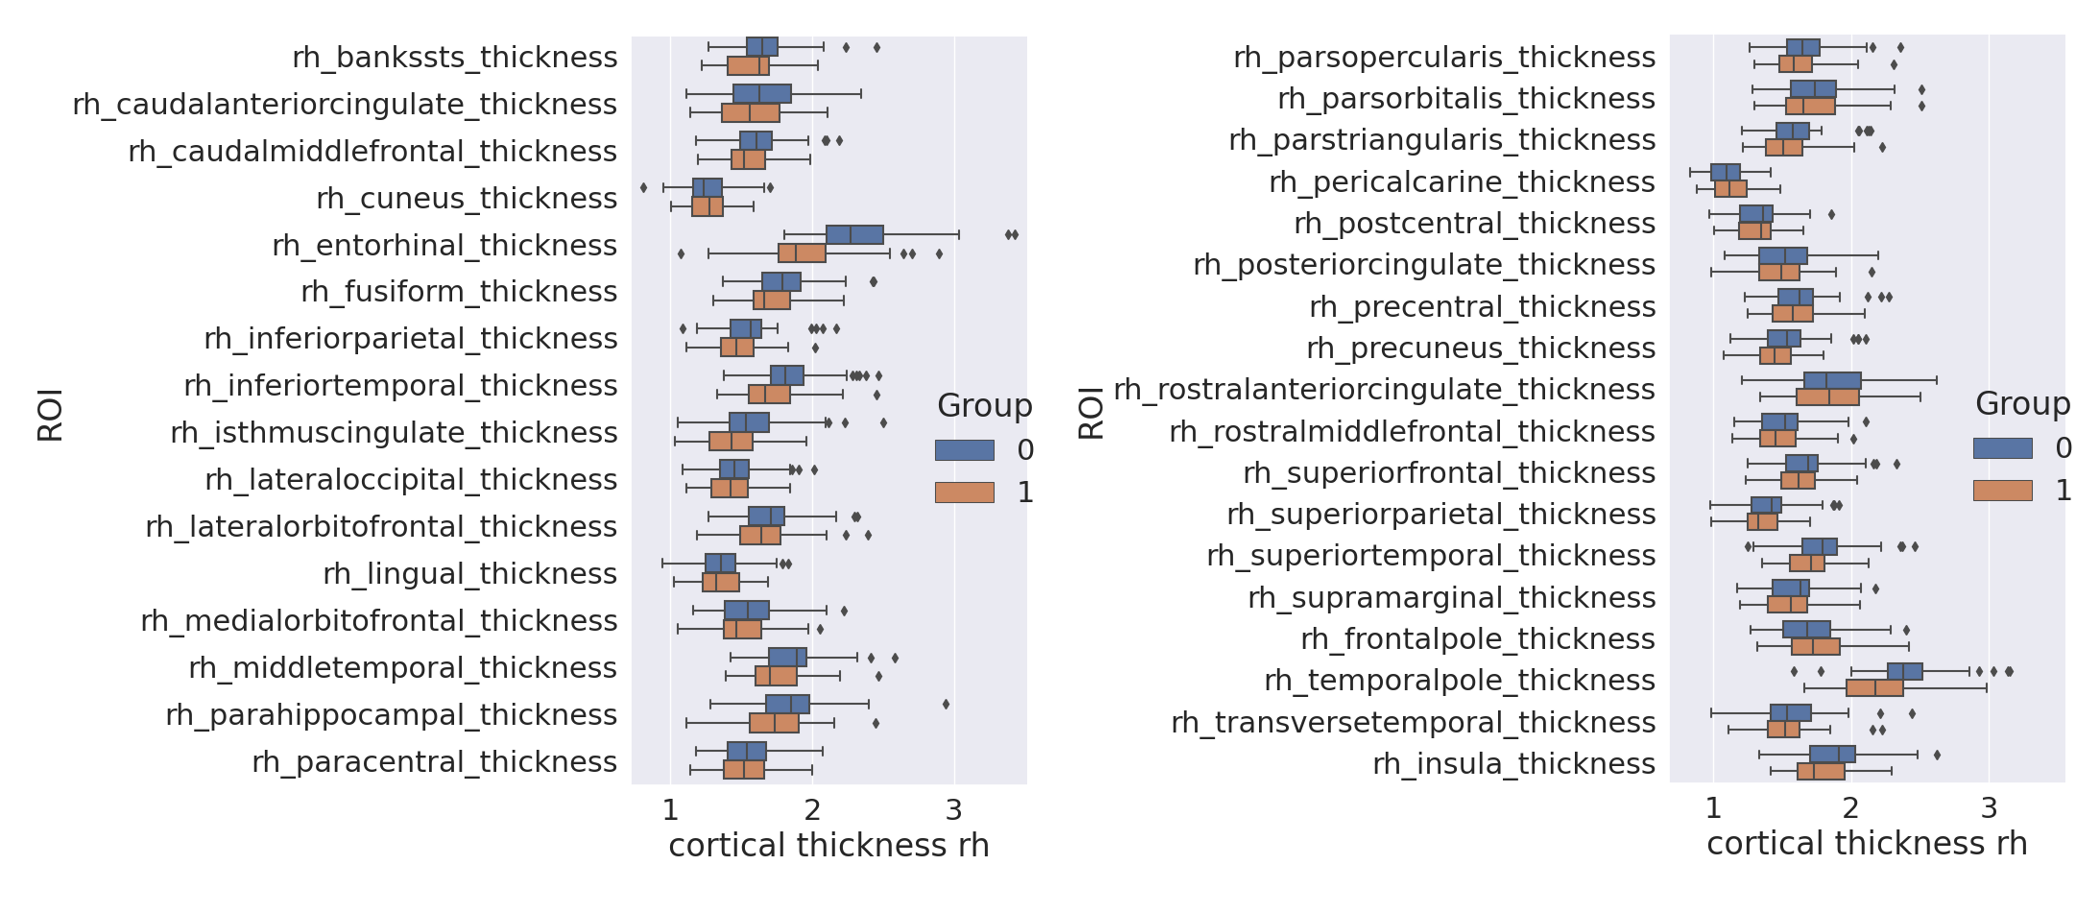

In [103]:
from IPython.display import Image
Image("thickness.png")

In [36]:
roi_1 = 'rh_entorhinal_thickness'
roi_2 = 'rh_temporalpole_thickness'

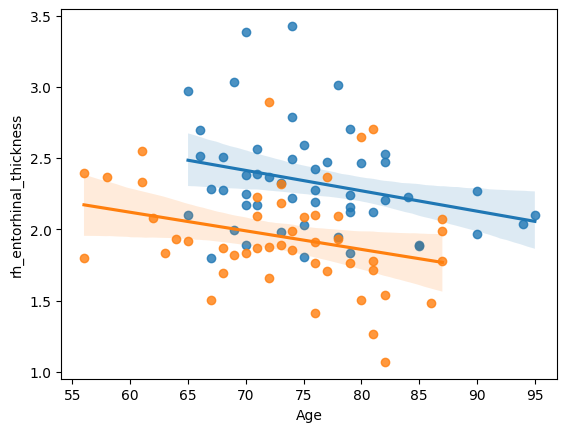

In [105]:
for _, gr in rh_thickness.groupby(['Group']):
    sns.regplot(x='Age', y=roi_1, data=gr)

## Sub-cortical segmentations

In [106]:
aseg_volumes = pd.read_csv('aseg_volumes.csv')

In [108]:
aseg_cols = ['Left-Lateral-Ventricle',
             'Left-Inf-Lat-Vent',
             'Left-Cerebellum-White-Matter',
             'Left-Cerebellum-Cortex',
             'Left-Thalamus-Proper',
             'Left-Caudate',
             'Left-Putamen',
             'Left-Pallidum',
             '3rd-Ventricle',
             '4th-Ventricle',
             'Brain-Stem',
             'Left-Hippocampus',
             'Left-Amygdala',
             'CSF',
             'Left-Accumbens-area',
             'Left-VentralDC',
             'Left-vessel',
             'Left-choroid-plexus',
             'Right-Lateral-Ventricle',
             'Right-Inf-Lat-Vent',
             'Right-Cerebellum-White-Matter',
             'Right-Cerebellum-Cortex',
             'Right-Thalamus-Proper',
             'Right-Caudate',
             'Right-Putamen',
             'Right-Pallidum',
             'Right-Hippocampus',
             'Right-Amygdala',
             'Right-Accumbens-area',
             'Right-VentralDC',
             'Right-vessel',
             'Right-choroid-plexus',
             '5th-Ventricle',]


In [109]:
df_aseg = aseg_volumes[['Group'] + aseg_cols]

In [110]:
df_aseg_new =  pd.melt(df_aseg,
                       id_vars=['Group'],
                       value_vars=aseg_cols,
                       var_name='ROI',
                       value_name='Subcortical ROIs')

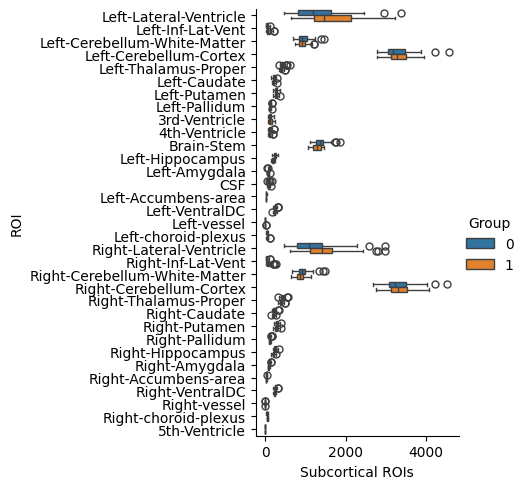

In [111]:
sns.catplot(data=df_aseg_new, x='Subcortical ROIs',
            y='ROI', hue='Group', kind='box')

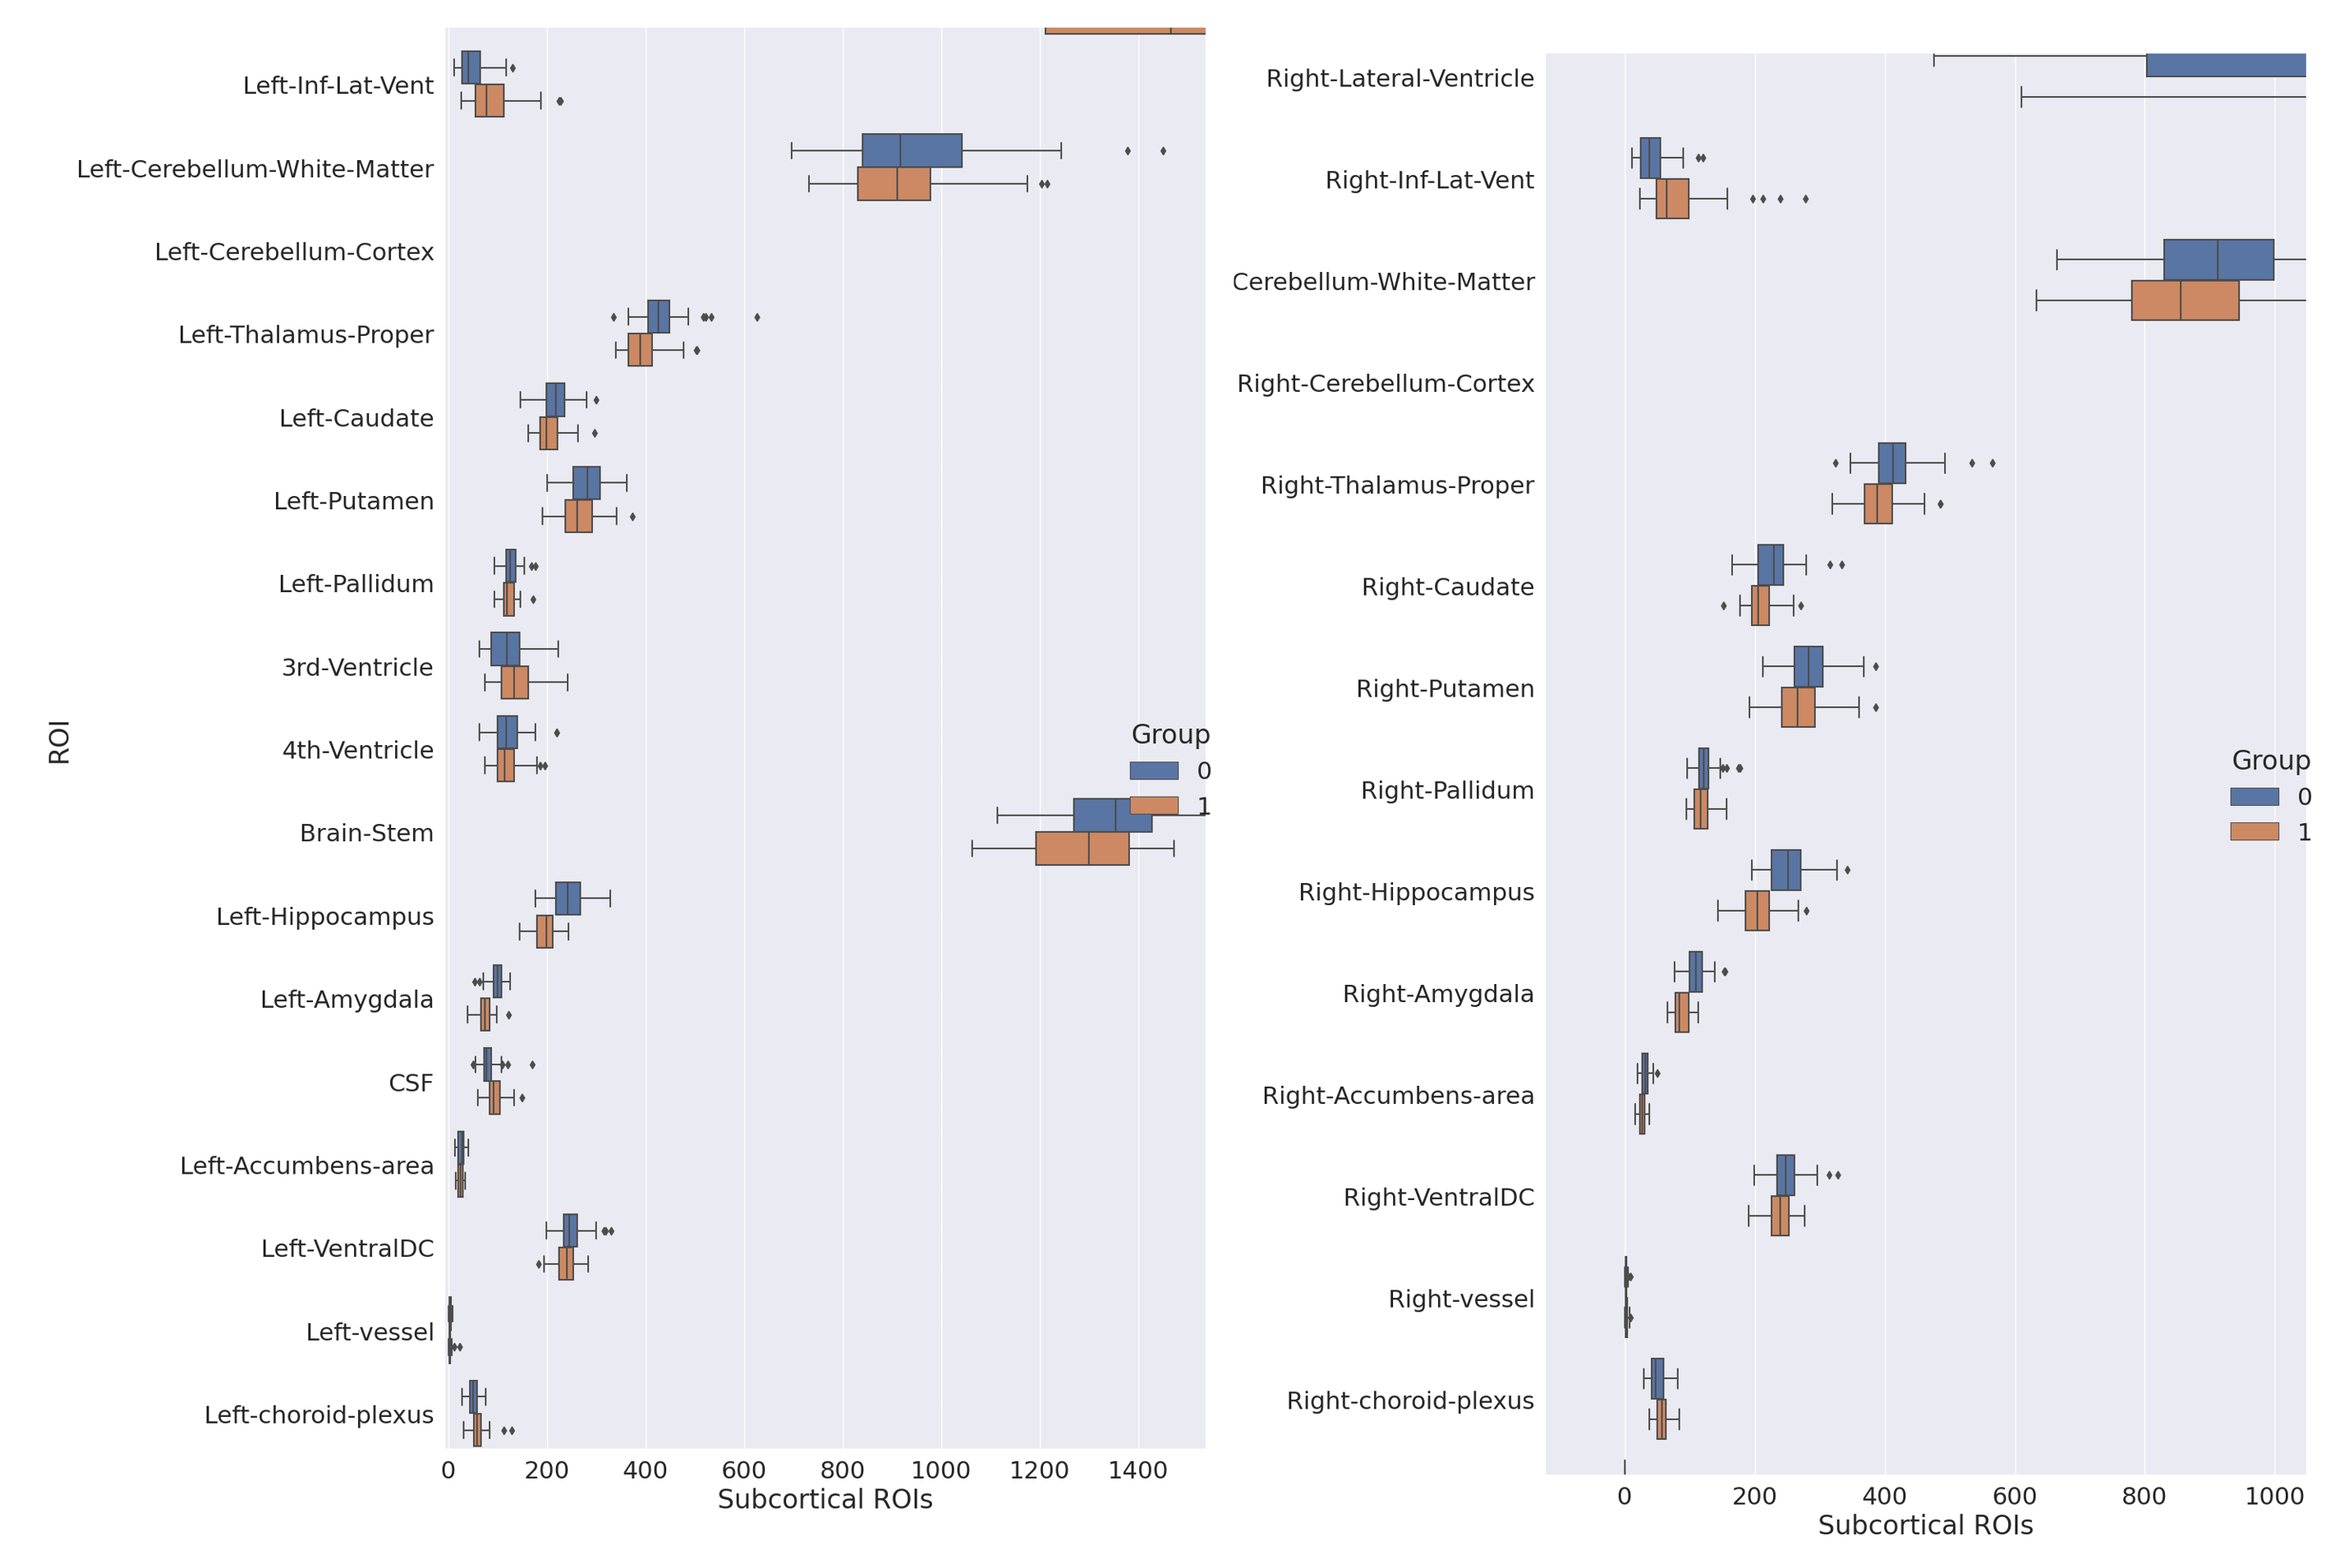

In [112]:
from IPython.display import Image
Image("aseg_vols.png")

In [114]:
aseg_roi_1 = 'Right-Hippocampus'
aseg_roi_2 = 'Right-Amygdala'

Text(0.5, 1.0, 'Hippocampus')

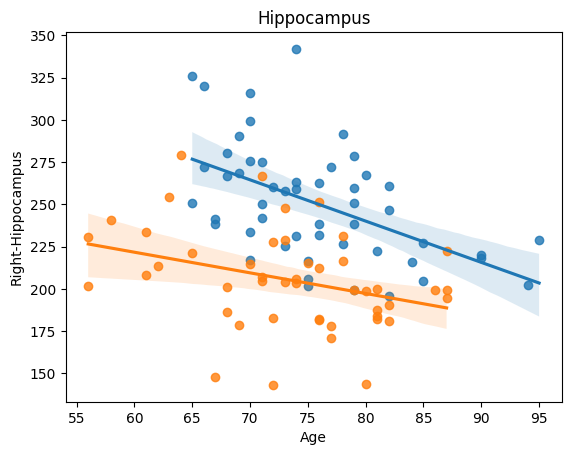

In [118]:
for _, gr in aseg_volumes.groupby(['Group']):
    sns.regplot(x='Age', y=aseg_roi_1, data=gr)
plt.title('Hippocampus')

## Demo: Statistical analysis with Jasp